# Machine Learning Assignment 2 Dylan Reeve

## Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the training data
train_data_path = 'project_data/train_dataset.csv'


# Load the datasets
train_df = pd.read_csv(train_data_path)

In [3]:
# Display the first 5 rows in the df

train_df.head(5)

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


In [4]:
# Display size of the train_df

train_df.shape

(3004, 27)

In [27]:
train_df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'facenumber_in_poster', 'country', 'content_rating', 'title_year',
       'movie_facebook_likes', 'average_degree_centrality',
       'imdb_score_binned', 'other_actor_facebbok_likes'],
      dtype='object')

In [5]:
# Display the data types of the attributes
train_df.dtypes

id                             int64
director_name                 object
num_critic_for_reviews         int64
duration                       int64
director_facebook_likes        int64
actor_3_facebook_likes         int64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                          int64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster           int64
plot_keywords                 object
num_user_for_reviews           int64
language                      object
country                       object
content_rating                object
title_year                     int64
actor_2_facebook_likes         int64
movie_facebook_likes           int64
title_embedding               object
average_degree_centrality    float64
imdb_score_binned              int64
d

In [6]:
# Checking for missing data

train_df.isna().any()

id                           False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
num_user_for_reviews         False
language                      True
country                      False
content_rating               False
title_year                   False
actor_2_facebook_likes       False
movie_facebook_likes         False
title_embedding              False
average_degree_centrality    False
imdb_score_binned            False
dtype: bool

In [7]:
# Checking how much data is missing

train_df.isna().sum()

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     1
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
imdb_score_binned            0
dtype: int64

In [8]:
# We can remove the missing data as there is only one instance

train_df.dropna(axis=0,subset=['language'], inplace=True)

In [9]:
train_df.shape

(3003, 27)

We only lose a single training instance which is insignificant

In [10]:
# Rechecking to ensure all entries are complete

train_df.isna().sum()

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
imdb_score_binned            0
dtype: int64

Imputation is not required as all entries have full data

In [11]:
#Count of the language values 

train_df["language"].value_counts()

language
English       2872
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Italian          5
Cantonese        5
Korean           4
Portuguese       4
Hindi            3
Norwegian        3
Dutch            3
Danish           3
Aboriginal       2
Thai             2
Indonesian       2
Dari             2
Persian          2
Kazakh           1
Maya             1
Aramaic          1
Filipino         1
Bosnian          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: count, dtype: int64

96% of movies are in English

In [13]:
#Value counts for the countries 

value_counts=train_df["country"].value_counts()
print(value_counts)

country
USA               2381
UK                 255
France              86
Germany             61
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: count, dtype: int64


USA makes up 79% of Movies
UK makes up 8% of Movies
The rest of the world makes up 13% of Movies (These should be merged)

In [14]:
# Convert countries that are neither USA or the UK to be classed as 'other'

vals = value_counts[:2].index
print(vals)
train_df['country'] = train_df.country.where(train_df.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object', name='country')


In [15]:
# Display the distribution of countries after merging

value_counts=train_df["country"].value_counts()

value_counts

country
USA      2381
other     367
UK        255
Name: count, dtype: int64

## Process tran and test data together

In [112]:
import numpy as np
import pandas as pd

# Define the path to the training data
train_data_path = 'project_data/train_dataset.csv'
test_data_path = 'project_data/test_dataset.csv'

# Load the datasets
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [113]:
# Remove one missing entry from train_df

train_df.dropna(axis=0,subset=['language'], inplace=True)

In [114]:
# Drop irrelvant categorical data

categoricalDataToDrop = ['director_name', 'actor_2_name', 'actor_1_name', 'movie_title',
                        'actor_3_name', 'plot_keywords', 'title_embedding']
train_df.drop(columns=categoricalDataToDrop,axis=1,inplace=True)
test_df.drop(columns=categoricalDataToDrop,axis=1,inplace=True)

In [115]:
# Preprocess country column

countries = ['USA', 'UK']

train_df['country'] = train_df.country.where(train_df.country.isin(countries), 'other')
test_df['country'] = test_df.country.where(test_df.country.isin(countries), 'other')

In [116]:
# Preprocess language column

vals = ['English']

train_df['language'] = train_df.language.where(train_df.language.isin(vals), 'other')
test_df['language'] = test_df.language.where(test_df.language.isin(vals), 'other')

In [117]:
# Derive new numeric data

# Genre count
train_df['genre_count'] = train_df['genres'].apply(lambda x: len(x.split('|')))
test_df['genre_count'] = test_df['genres'].apply(lambda x: len(x.split('|')))


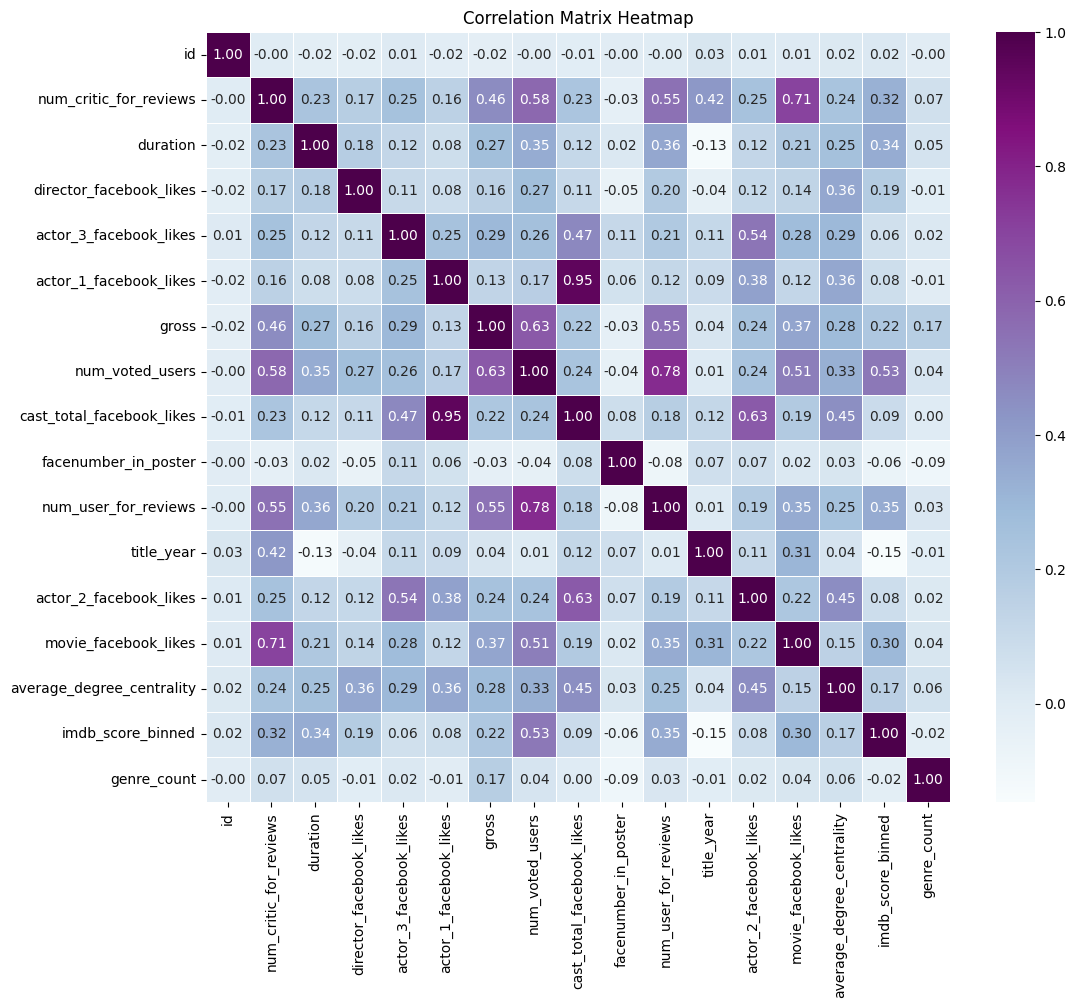

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
# Print new correlation matrix
numeric_df = train_df.select_dtypes(include=[np.number])  # 'np.number' includes both floats and ints

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [119]:
# Drop correlated numeric data
numericDataToDrop = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                     'num_user_for_reviews', 'facenumber_in_poster', 'actor_1_facebook_likes']

train_df.drop(columns=numericDataToDrop,axis=1,inplace=True)
test_df.drop(columns=numericDataToDrop,axis=1,inplace=True)

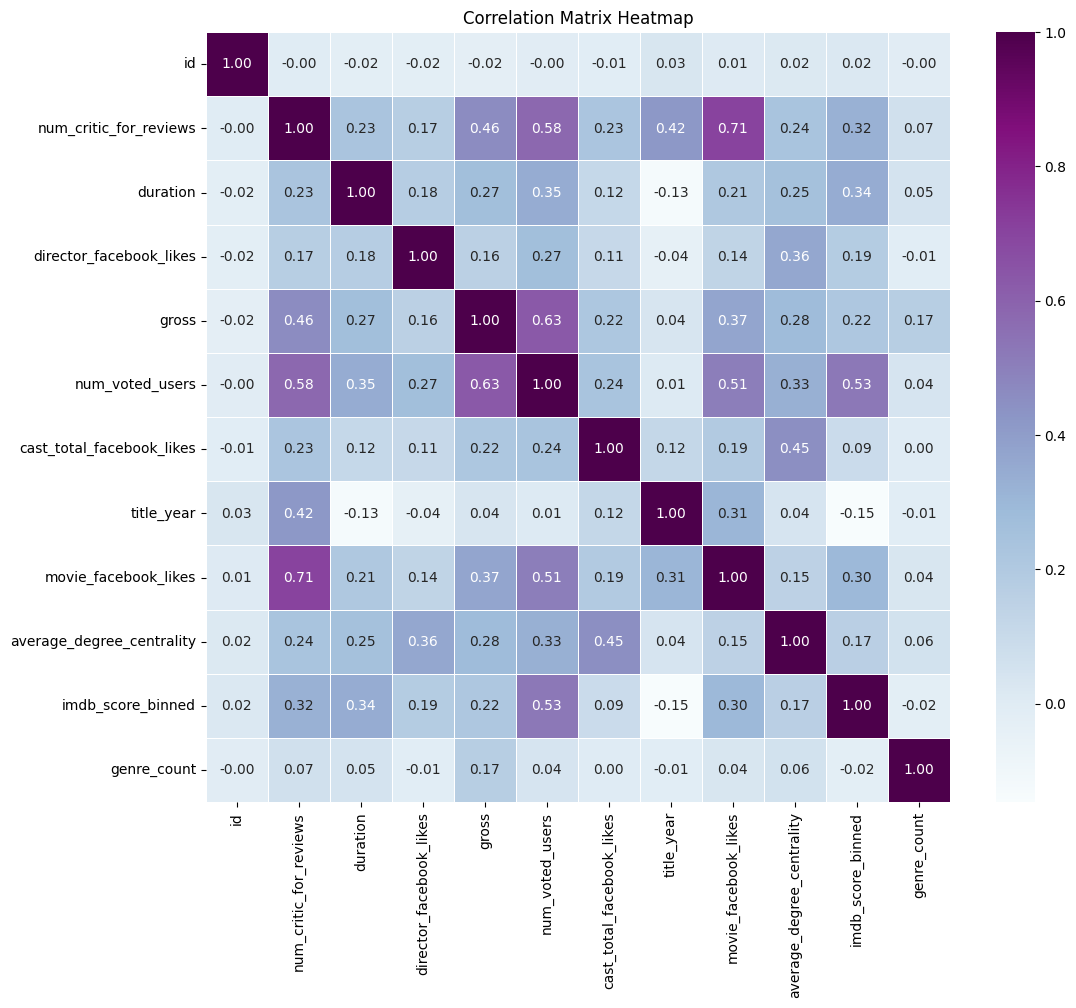

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
# Print new correlation matrix
numeric_df = train_df.select_dtypes(include=[np.number])  # 'np.number' includes both floats and ints

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
class MultiLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, separator='|'):
        self.separator = separator
    
    def fit(self, X, y=None):
        genres = set()
        # Iterate over each row in the DataFrame column
        for row in X.iloc[:, 0]:  # Use .iloc to handle DataFrame input correctly
            genres.update(row.split(self.separator))
        self.classes_ = sorted(genres)
        return self
    
    def transform(self, X):
        # Prepare to handle DataFrame input by using .iloc
        result = []
        for row in X.iloc[:, 0]:
            row_genres = row.split(self.separator)
            result.append([1 if genre in row_genres else 0 for genre in self.classes_])
        return np.array(result)

    def get_feature_names_out(self, input_features=None):
        # Generate feature names based on the classes
        return np.array(['genre_' + class_ for class_ in self.classes_])


In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Y_train = train_df['imdb_score_binned']  # Isolate the target column
features_train_df = train_df.drop('imdb_score_binned', axis=1)  # Drop the target column from the DataFrame

# Update this section if your current setup incorrectly includes the target column
column_transformer = ColumnTransformer(
    [
        ('country_encoder', OneHotEncoder(handle_unknown='ignore'), ['country']),
        ('language_encoder', OneHotEncoder(handle_unknown='ignore'), ['language']),
        ('content_rating_encoder', OneHotEncoder(handle_unknown='ignore'), ['content_rating']),
        ('genres_encoder', MultiLabelBinarizer(), ['genres'])  # Custom transformer for genres
    ],
    remainder='passthrough'  # keeps all other columns untouched
)

# Fit the transformer on the training data without the target column
column_transformer.fit(features_train_df)


ColumnTransformer(remainder='passthrough',
                  transformers=[('country_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country']),
                                ('language_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['language']),
                                ('content_rating_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['content_rating']),
                                ('genres_encoder', MultiLabelBinarizer(),
                                 ['genres'])])

In [123]:
# Transform the training data
train_df_transformed = column_transformer.transform(features_train_df)

# Transform the test data
test_df_transformed = column_transformer.transform(test_df)

# Convert the transformed data back into DataFrames
columns = column_transformer.get_feature_names_out()
train_df = pd.DataFrame(train_df_transformed, columns=columns, index=train_df.index)
test_df = pd.DataFrame(test_df_transformed, columns=columns, index=test_df.index)

In [124]:
# Dataframes have same number of columns
print(test_df.shape)
print(train_df.shape)

(752, 50)
(3003, 50)


In [125]:
# Setup training data
X_train = train_df.drop(['remainder__id'], axis=1)  # Drop the ID from the feature set
# Y_train already defined

# Setup test data
X_test = test_df.drop('remainder__id', axis=1)  # Ensure ID is not included in the test features
test_ids = test_df['remainder__id']  # Store test IDs to use later in results DataFrame

## Developing a Bassline
### 0-R Bassline

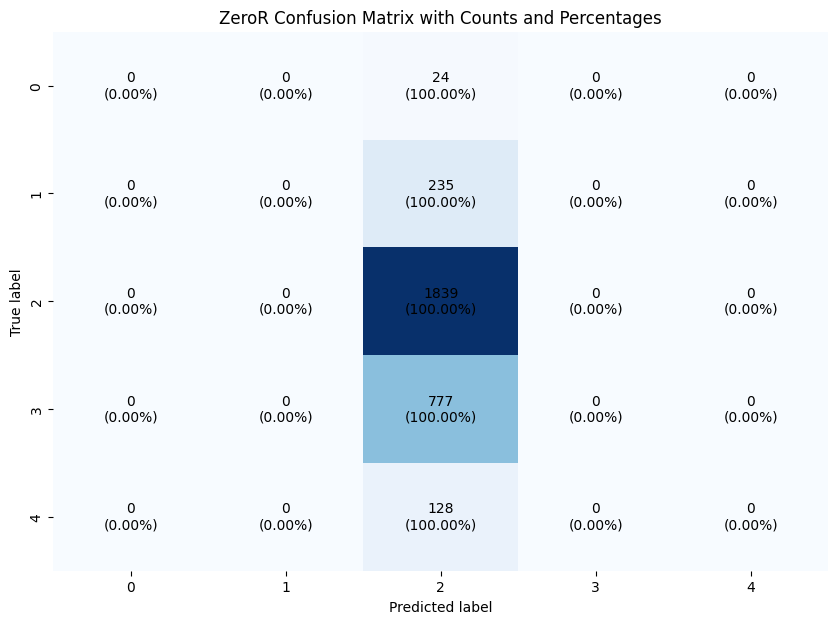

Accuracy scores for each fold: [0.61231281 0.61231281 0.61064892 0.61333333 0.61333333]
Mean cross-validation accuracy: 0.6123882418191903
Precision scores for each fold: [0.76261417 0.76261417 0.76224318 0.76284444 0.76284444]
Mean cross-validation precision: 0.7626320815034042
Recall scores for each fold: [0.61231281 0.61231281 0.61064892 0.61333333 0.61333333]
Mean cross-validation recall: 0.6123882418191903
F1 scores for each fold: [0.4650797  0.4650797  0.46303337 0.46633609 0.46633609]
Mean cross-validation f1: 0.465172990218394
Precision: 0.7626309754181884
Recall: 0.6123876123876124
F1 Score: 0.4651717551345804


In [145]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the ZeroR model
zero_r_classifier = DummyClassifier(strategy='most_frequent', random_state=42)

# Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and get predictions
predictions = cross_val_predict(zero_r_classifier, X_train, Y_train.values.ravel(), cv=cv)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)

# Plot confusion matrix with counts and normalized values (function definition omitted for brevity, use the one from the previous code snippet)

# Plot confusion matrix with counts and normalized values
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2, 3, 4], title='ZeroR Confusion Matrix with Counts and Percentages')

# Define scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Calculate and print scores for each metric
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(zero_r_classifier, X_train, Y_train.values.ravel(), cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()} scores for each fold:", scores)
    print(f"Mean cross-validation {metric_name}:", scores.mean())

# Calculate precision, recall, and F1 score using the cross-validated predictions
precision = precision_score(Y_train, predictions, average='weighted', zero_division=1)
recall = recall_score(Y_train, predictions, average='weighted')
f1 = f1_score(Y_train, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## Tree Based Models Experimentation
### Random Forest

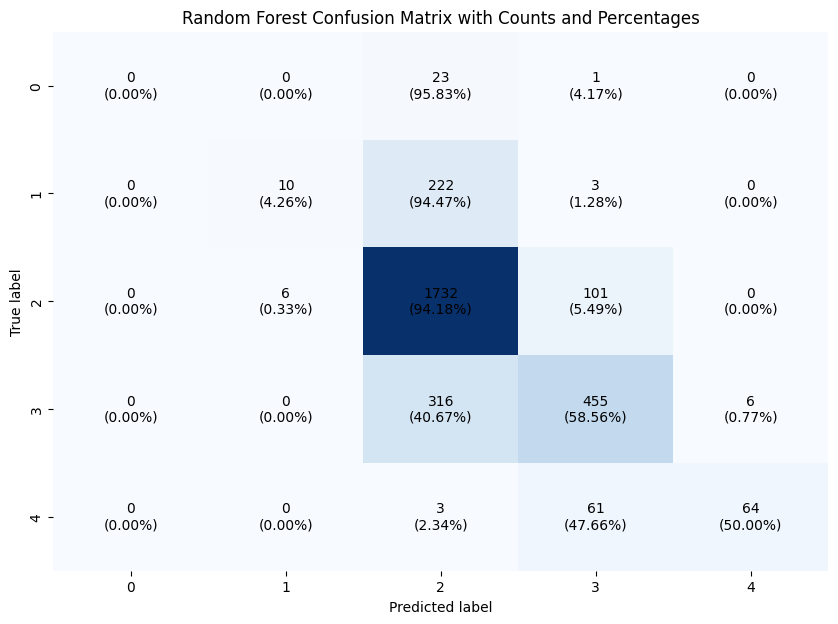

Accuracy scores for each fold: [0.76372712 0.7437604  0.76206323 0.745      0.75166667]
Mean cross-validation accuracy: 0.7532434830837493
Precision scores for each fold: [0.73404442 0.74294433 0.75604524 0.73354981 0.72030225]
Mean cross-validation precision: 0.7373772102857103
Recall scores for each fold: [0.76539101 0.74708819 0.75873544 0.74166667 0.74666667]
Mean cross-validation recall: 0.7519095951192456
F1 scores for each fold: [0.72692092 0.70722943 0.72330237 0.70094483 0.70541073]
Mean cross-validation f1: 0.7127616547331181
Precision: 0.7474068165895162
Recall: 0.752913752913753
F1 Score: 0.7152262904797142
Most important features and their importance scores:
remainder__num_voted_users: 0.14937974489941422
remainder__title_year: 0.08010444124417415
remainder__num_critic_for_reviews: 0.0774358873170335
remainder__duration: 0.0766334907866952
remainder__gross: 0.07429691319188893
remainder__cast_total_facebook_likes: 0.06917610219338483
remainder__movie_facebook_likes: 0.0672

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline that includes scaling and Random Forest
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, criterion='gini'))

# Fit the pipeline on the entire training data
# Assuming 'X_train' and 'Y_train' are your feature and target sets from the training data
pipeline.fit(X_train, Y_train.values.ravel())

# Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and get predictions
predictions = cross_val_predict(pipeline, X_train, Y_train.values.ravel(), cv=cv)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)

# Function to plot the confusion matrix with counts and normalized values
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=False, fmt="d", cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    
    # Annotate each cell with counts and normalized values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            norm_value = cm[i, j] / cm.sum(axis=1)[i]
            ax.text(j + 0.5, i + 0.5, f'{count}\n({norm_value:.2%})',
                    ha='center', va='center', color='black')
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix with counts and normalized values
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2, 3, 4], title='Random Forest Confusion Matrix with Counts and Percentages')

# Define scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Calculate and print scores for each metric
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(pipeline, X_train, Y_train.values.ravel(), cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()} scores for each fold:", scores)
    print(f"Mean cross-validation {metric_name}:", scores.mean())

# Calculate precision, recall, and F1 score using the cross-validated predictions
precision = precision_score(Y_train, predictions, average='weighted', zero_division=1)
recall = recall_score(Y_train, predictions, average='weighted')
f1 = f1_score(Y_train, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Get the indices of the most important features
most_important_indices = feature_importances.argsort()[::-1]

# Get the names and importance scores of the most important features
feature_names = X_train.columns
most_important_features = [(feature_names[i], feature_importances[i]) for i in most_important_indices]

# Print the most important features and their importance scores
print("Most important features and their importance scores:")
for feature, importance in most_important_features[:15]:
    print(f"{feature}: {importance}")


In [4]:
from prettytable import PrettyTable

# Title for the table
title = "Random Forest's 10 Most Important Features"

# Create a table instance
table = PrettyTable()

# Define column names
table.field_names = ["Feature", "Importance Score"]

# Data for the table with 'remainder' removed
data = [
    ["num_voted_users", 0.1494],
    ["title_year", 0.0801],
    ["num_critic_for_reviews", 0.0774],
    ["duration", 0.0766],
    ["gross", 0.0743],
    ["cast_total_facebook_likes", 0.0692],
    ["movie_facebook_likes", 0.0672],
    ["director_facebook_likes", 0.0654],
    ["average_degree_centrality", 0.0566],
    ["genre_count", 0.0306]
]

# Add rows to the table
for row in data:
    table.add_row(row)

# Set alignment for the columns
table.align["Feature"] = "l"
table.align["Importance Score"] = "r"

# Add a title to the table
table.title = title

# Print the table
print(table)



+----------------------------------------------+
|  Random Forest's 10 Most Important Features  |
+---------------------------+------------------+
| Feature                   | Importance Score |
+---------------------------+------------------+
| num_voted_users           |           0.1494 |
| title_year                |           0.0801 |
| num_critic_for_reviews    |           0.0774 |
| duration                  |           0.0766 |
| gross                     |           0.0743 |
| cast_total_facebook_likes |           0.0692 |
| movie_facebook_likes      |           0.0672 |
| director_facebook_likes   |           0.0654 |
| average_degree_centrality |           0.0566 |
| genre_count               |           0.0306 |
+---------------------------+------------------+


### XGBoosting

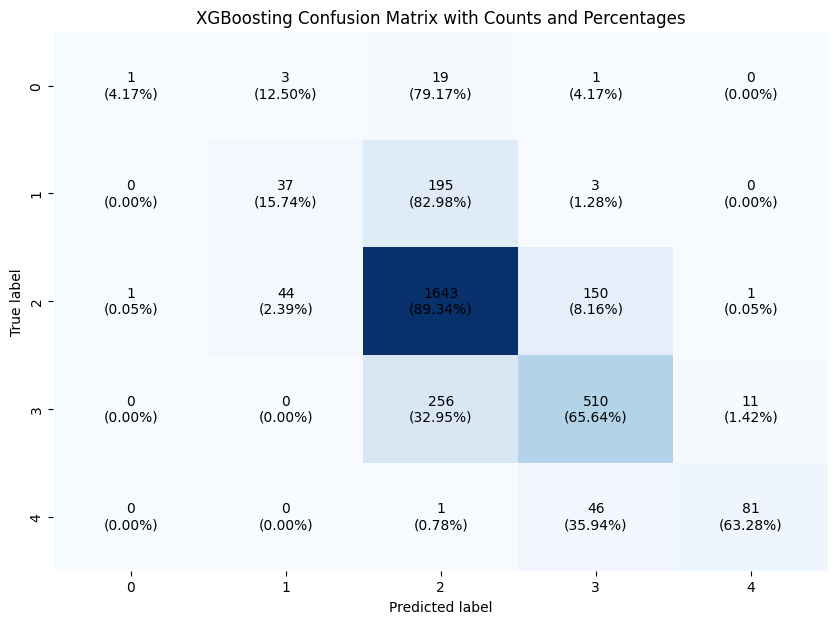

Accuracy scores for each fold: [0.78369384 0.75707155 0.74708819 0.74166667 0.75333333]
Mean cross-validation accuracy: 0.7565707154742096
Precision scores for each fold: [0.77049264 0.74454217 0.73256459 0.72343219 0.73881081]
Mean cross-validation precision: 0.7419684770392041
Recall scores for each fold: [0.78369384 0.75707155 0.74708819 0.74166667 0.75333333]
Mean cross-validation recall: 0.7565707154742096
F1 scores for each fold: [0.75994621 0.73908732 0.72789262 0.72291337 0.7306352 ]
Mean cross-validation f1: 0.7360949460863349
Precision: 0.7373934866337477
Recall: 0.7565767565767566
F1 Score: 0.7365528474872657
Most important features and their importance scores:
genres_encoder__genre_Drama: 0.08844717592000961
language_encoder__language_English: 0.08252875506877899
remainder__num_voted_users: 0.05356091633439064
genres_encoder__genre_Biography: 0.04708581045269966
genres_encoder__genre_Documentary: 0.0431206040084362
content_rating_encoder__content_rating_G: 0.039666492491960

In [128]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline that includes scaling and XGBoost
pipeline = make_pipeline(StandardScaler(), xgb.XGBClassifier())

# Fit the pipeline on the entire training data
# Assuming 'X_train' and 'Y_train' are your feature and target sets from the training data
pipeline.fit(X_train, Y_train.values.ravel())

# Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and get predictions
predictions = cross_val_predict(pipeline, X_train, Y_train.values.ravel(), cv=cv)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)

# Function to plot the confusion matrix with counts and normalized values
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=False, fmt="d", cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    
    # Annotate each cell with counts and normalized values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            norm_value = cm[i, j] / cm.sum(axis=1)[i]
            ax.text(j + 0.5, i + 0.5, f'{count}\n({norm_value:.2%})',
                    ha='center', va='center', color='black')
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix with counts and normalized values
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2, 3, 4], title='XGBoosting Confusion Matrix with Counts and Percentages')

# Define scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Calculate and print scores for each metric
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(pipeline, X_train, Y_train.values.ravel(), cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()} scores for each fold:", scores)
    print(f"Mean cross-validation {metric_name}:", scores.mean())

# Calculate precision, recall, and F1 score using the cross-validated predictions
precision = precision_score(Y_train, predictions, average='weighted', zero_division=1)
recall = recall_score(Y_train, predictions, average='weighted')
f1 = f1_score(Y_train, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Get feature importances
feature_importances = pipeline.named_steps['xgbclassifier'].feature_importances_

# Get the indices of the most important features
most_important_indices = feature_importances.argsort()[::-1]

# Get the names and importance scores of the most important features
feature_names = X_train.columns
most_important_features = [(feature_names[i], feature_importances[i]) for i in most_important_indices]

# Print the most important features and their importance scores
print("Most important features and their importance scores:")
for feature, importance in most_important_features[:15]:
    print(f"{feature}: {importance}")


In [5]:
from prettytable import PrettyTable

# Improved title for the table
title = "XGBoost's 10 Most Important Features and Their Importance Scores"

# Create a table instance
table = PrettyTable()

# Define column names
table.field_names = ["Feature", "Importance Score"]

# Data for the table
data = [
    ["genre_Drama", 0.08844717592000961],
    ["language_English", 0.08252875506877899],
    ["num_voted_users", 0.05356091633439064],
    ["genre_Biography", 0.04708581045269966],
    ["genre_Documentary", 0.0431206040084362],
    ["content_rating_G", 0.039666492491960526],
    ["country_USA", 0.038974612951278687],
    ["genre_Horror", 0.03695352002978325],
    ["genre_Action", 0.03391578048467636],
    ["genre_Animation", 0.0318765714764595]
]

# Add rows to the table
for row in data:
    table.add_row(row)

# Set alignment for the columns
table.align["Feature"] = "l"
table.align["Importance Score"] = "r"

# Add the improved title to the table
table.title = title

# Print the table
print(table)


+------------------------------------------------------------------+
| XGBoost's 10 Most Important Features and Their Importance Scores |
+------------------------------+-----------------------------------+
| Feature                      |                  Importance Score |
+------------------------------+-----------------------------------+
| genre_Drama                  |               0.08844717592000961 |
| language_English             |               0.08252875506877899 |
| num_voted_users              |               0.05356091633439064 |
| genre_Biography              |               0.04708581045269966 |
| genre_Documentary            |                0.0431206040084362 |
| content_rating_G             |              0.039666492491960526 |
| country_USA                  |              0.038974612951278687 |
| genre_Horror                 |               0.03695352002978325 |
| genre_Action                 |               0.03391578048467636 |
| genre_Animation              |  

## Support Vector Machine Experimentation
### Support Vector Classifier (SVC)

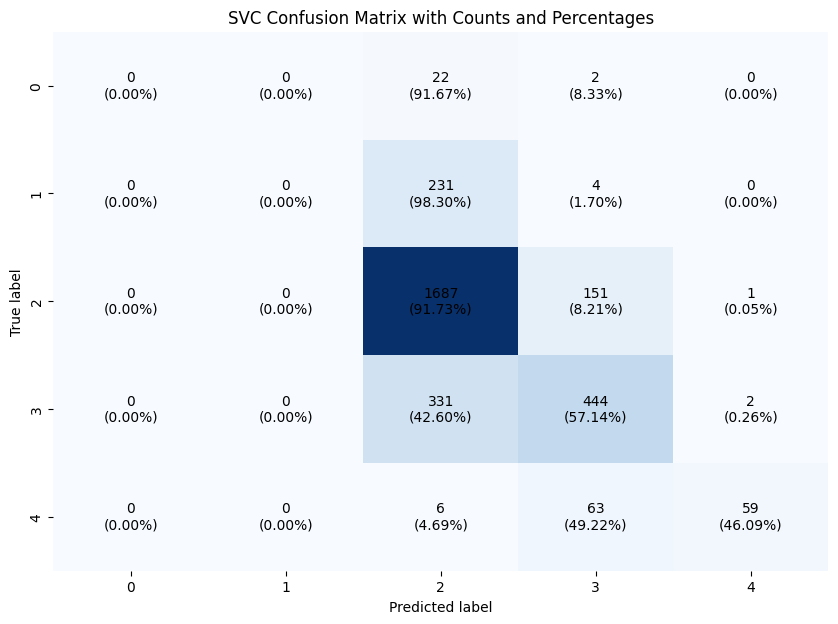

Accuracy scores for each fold: [0.75707155 0.71381032 0.73044925 0.71833333 0.72666667]
Mean cross-validation accuracy: 0.7292662229617304
Precision scores for each fold: [0.78204421 0.73782121 0.75255461 0.74399102 0.75441074]
Mean cross-validation precision: 0.7541643570825294
Recall scores for each fold: [0.75707155 0.71381032 0.73044925 0.71833333 0.72666667]
Mean cross-validation recall: 0.7292662229617304
F1 scores for each fold: [0.71627182 0.67114365 0.69243918 0.67724595 0.68028914]
Mean cross-validation f1: 0.6874779488915722
Precision: 0.7535325103819148
Recall: 0.7292707292707292
F1 Score: 0.68790936281535


In [129]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline that includes scaling and SVC
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))

# Fit the pipeline on the entire training data
# Assuming 'X_train' and 'Y_train' are your feature and target sets from the training data
pipeline.fit(X_train, Y_train.values.ravel())

# Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and get predictions
predictions = cross_val_predict(pipeline, X_train, Y_train.values.ravel(), cv=cv)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)

# Function to plot the confusion matrix with counts and normalized values
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=False, fmt="d", cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    
    # Annotate each cell with counts and normalized values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            norm_value = cm[i, j] / cm.sum(axis=1)[i]
            ax.text(j + 0.5, i + 0.5, f'{count}\n({norm_value:.2%})',
                    ha='center', va='center', color='black')
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix with counts and normalized values
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2, 3, 4], title='SVC Confusion Matrix with Counts and Percentages')

# Define scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Calculate and print scores for each metric
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(pipeline, X_train, Y_train.values.ravel(), cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()} scores for each fold:", scores)
    print(f"Mean cross-validation {metric_name}:", scores.mean())

# Calculate precision, recall, and F1 score using the cross-validated predictions
precision = precision_score(Y_train, predictions, average='weighted', zero_division=1)
recall = recall_score(Y_train, predictions, average='weighted')
f1 = f1_score(Y_train, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## Linear Models Experimentation
### Logistic Regression

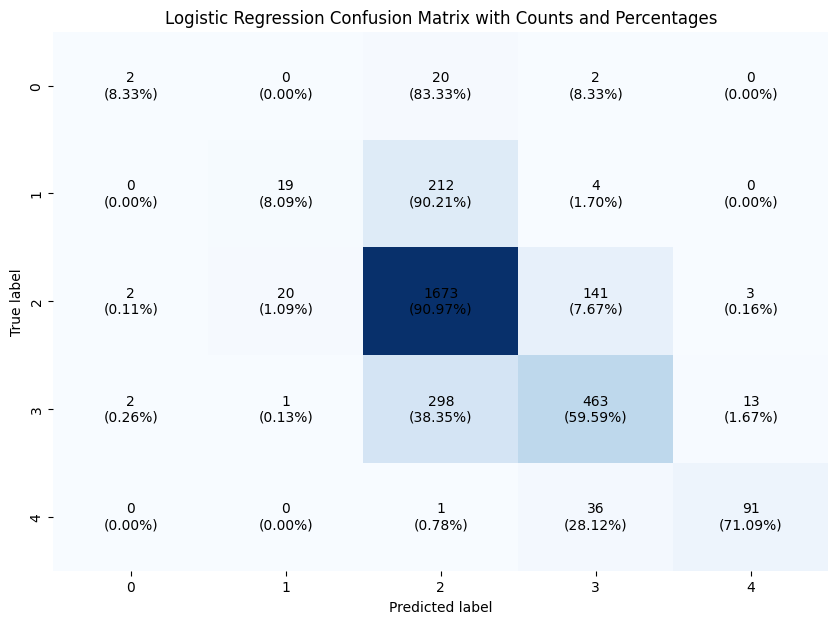

Accuracy scores for each fold: [0.76039933 0.76705491 0.73211314 0.735      0.74833333]
Mean cross-validation accuracy: 0.7485801442041042
Precision scores for each fold: [0.72125848 0.75535257 0.70864435 0.71468945 0.73368058]
Mean cross-validation precision: 0.7267250868027547
Recall scores for each fold: [0.76039933 0.76705491 0.73211314 0.735      0.74833333]
Mean cross-validation recall: 0.7485801442041042
F1 scores for each fold: [0.7271392  0.7404314  0.70614066 0.70736256 0.71760594]
Mean cross-validation f1: 0.7197359511375866
Precision: 0.7263778708803698
Recall: 0.7485847485847485
F1 Score: 0.7200767157217913
Feature weights:
remainder__title_year: 0.7004077016803106
genres_encoder__genre_Sci-Fi: 0.4621936201359271
language_encoder__language_English: 0.29851494727418815
content_rating_encoder__content_rating_PG-13: 0.2941146237003665
genres_encoder__genre_Adventure: 0.29365262211169096
genres_encoder__genre_Horror: 0.28319004823518995
genres_encoder__genre_Family: 0.23195833

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline that includes scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the pipeline on the entire training data
# Assuming 'X_train' and 'Y_train' are your feature and target sets from the training data
pipeline.fit(X_train, Y_train.values.ravel())

# Setup StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and get predictions
predictions = cross_val_predict(pipeline, X_train, Y_train.values.ravel(), cv=cv)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)

# Function to plot the confusion matrix with counts and normalized values
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=False, fmt="d", cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    
    # Annotate each cell with counts and normalized values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            norm_value = cm[i, j] / cm.sum(axis=1)[i]
            ax.text(j + 0.5, i + 0.5, f'{count}\n({norm_value:.2%})',
                    ha='center', va='center', color='black')
    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix with counts and normalized values
plot_confusion_matrix(conf_matrix, classes=[0, 1, 2, 3, 4], title='Logistic Regression Confusion Matrix with Counts and Percentages')

# Define scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Calculate and print scores for each metric
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(pipeline, X_train, Y_train.values.ravel(), cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()} scores for each fold:", scores)
    print(f"Mean cross-validation {metric_name}:", scores.mean())

# Calculate precision, recall, and F1 score using the cross-validated predictions
precision = precision_score(Y_train, predictions, average='weighted', zero_division=1)
recall = recall_score(Y_train, predictions, average='weighted')
f1 = f1_score(Y_train, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Get the coefficients (weights) of the logistic regression model
coefficients = pipeline.named_steps['logisticregression'].coef_

# Get the names of the features
feature_names = X_train.columns

# Create a list of tuples with feature names and their corresponding weights
feature_weights = [(feature_names[i], coefficients[0][i]) for i in range(len(feature_names))]

# Sort the features by their weights
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Print the feature names and their corresponding weights
print("Feature weights:")
for feature, weight in sorted_feature_weights:
    print(f"{feature}: {weight}")


In [7]:
from prettytable import PrettyTable

# Improved title for the table
title = "Logistic Regression Features with Weights > 0.3 or < -0.3"

# Create a table instance
table = PrettyTable()

# Define column names
table.field_names = ["Feature", "Weight"]

# Data for the table
data = [
    ["title_year", 0.7004077016803106],
    ["genre_Sci-Fi", 0.4621936201359271],
    ["genre_Musical", -0.30556042017622387],
    ["genre_Biography", -0.3183755507706688],
    ["duration", -0.3364918008904694],
    ["genre_Animation", -0.3904034477912267],
    ["genre_Mystery", -0.5410777054115619],
    ["cast_total_facebook_likes", -0.6706712675539381],
    ["average_degree_centrality", -0.6759965164038315],
    ["num_critic_for_reviews", -0.7334989399546776],
    ["genre_Drama", -0.9171167200407353],
    ["gross", -1.204496658905708]
]

# Filter the data
filtered_data = [row for row in data if row[1] > 0.3 or row[1] < -0.3]

# Add rows to the table
for row in filtered_data:
    table.add_row(row)

# Set alignment for the columns
table.align["Feature"] = "l"
table.align["Weight"] = "r"

# Add the improved title to the table
table.title = title

# Print the table
print(table)


+-----------------------------------------------------------+
| Logistic Regression Features with Weights > 0.3 or < -0.3 |
+--------------------------------+--------------------------+
| Feature                        |                   Weight |
+--------------------------------+--------------------------+
| title_year                     |       0.7004077016803106 |
| genre_Sci-Fi                   |       0.4621936201359271 |
| genre_Musical                  |     -0.30556042017622387 |
| genre_Biography                |      -0.3183755507706688 |
| duration                       |      -0.3364918008904694 |
| genre_Animation                |      -0.3904034477912267 |
| genre_Mystery                  |      -0.5410777054115619 |
| cast_total_facebook_likes      |      -0.6706712675539381 |
| average_degree_centrality      |      -0.6759965164038315 |
| num_critic_for_reviews         |      -0.7334989399546776 |
| genre_Drama                    |      -0.9171167200407353 |
| gross 

## Selecting the best model

In [155]:
from prettytable import PrettyTable

# Create a table instance
table = PrettyTable()

# Define column names
table.field_names = ["Model", "Avg Accuracy", "Avg Precision", "Avg Recall", "Avg F1"]

# Add rows to the table
table.add_row(["ZeroR", "0.6124", "\033[1m0.7626\033[0m", "0.6124", "0.4652"])
table.add_row(["Random Forest", "0.7532", "0.7374", "0.7519", "0.7128"])
table.add_row(["XGBoost", "\033[1m0.7566\033[0m", "0.7420", "\033[1m0.7566\033[0m", "\033[1m0.7361\033[0m"])
table.add_row(["SVC", "0.7293", "0.7542", "0.7293", "0.6875"])
table.add_row(["Logistic Regression", "0.7485", "0.7267", "0.7486", "0.7197"])

# Set alignment for the columns
table.align["Model"] = "l"
table.align["Avg Accuracy"] = "r"
table.align["Avg Precision"] = "r"
table.align["Avg Recall"] = "r"
table.align["Avg F1"] = "r"

# Give the table a name
table.title = "Models Performance Metrics"

# Print the table
print(table)


+--------------------------------------------------------------------------+
|                        Models Performance Metrics                        |
+---------------------+--------------+---------------+------------+--------+
| Model               | Avg Accuracy | Avg Precision | Avg Recall | Avg F1 |
+---------------------+--------------+---------------+------------+--------+
| ZeroR               |       0.6124 |        0.7626 |     0.6124 | 0.4652 |
| Random Forest       |       0.7532 |        0.7374 |     0.7519 | 0.7128 |
| XGBoost             |       0.7566 |        0.7420 |     0.7566 | 0.7361 |
| SVC                 |       0.7293 |        0.7542 |     0.7293 | 0.6875 |
| Logistic Regression |       0.7485 |        0.7267 |     0.7486 | 0.7197 |
+---------------------+--------------+---------------+------------+--------+


In [153]:
from prettytable import PrettyTable

# Create a table instance
table = PrettyTable()

# Define column names
table.field_names = ["Metric", "Value"]

# Add rows to the table
table.add_row(["Accuracy", "0.6124"])
table.add_row(["Precision", "0.7626"])
table.add_row(["Recall", "0.6124"])
table.add_row(["F1", "0.4652"])

# Set alignment for the columns
table.align["Metric"] = "l"
table.align["Accuracy"] = "r"
table.align["Precision"] = "r"
table.align["Recall"] = "r"
table.align["F1"] = "r"

# Give the table a name
table.title = "ZeroR Performance Metrics"
# Print the table
print(table)

+---------------------------+
| ZeroR Performance Metrics |
+---------------+-----------+
| Metric        |   Value   |
+---------------+-----------+
| Accuracy      |   0.6124  |
| Precision     |   0.7626  |
| Recall        |   0.6124  |
| F1            |   0.4652  |
+---------------+-----------+


## Final Predictions using XGB Classifier

In [133]:
import xgboost as xgb

# Make predictions using XGBoost
xgb_model = xgb.XGBClassifier(colsample_bytree = 1.0,
                             learning_rate = 0.1,
                             max_depth = 7,
                             n_estimators = 100,
                             reg_alpha = 0.5,
                             reg_lambda = 0.5,
                             subsample = 0.8)
xgb_model.fit(X_train, Y_train)
predictions = xgb_model.predict(X_test)

# You can now use 'predictions' and 'prob_predictions' as needed, for example to create a submission file
print(predictions)


[2 3 2 3 2 2 4 3 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 2
 3 2 2 4 2 2 2 2 3 1 2 2 2 3 2 3 2 2 4 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 4 3
 2 4 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 3 3 2 3 1 2 2 2 2 3 2 3 2 3 3 2 2 2 2 4 2 2 2 2 2 3 2 4 2 3 2 3 2 2 3 2
 3 2 2 2 2 2 2 2 2 2 3 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 3 3 2
 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 2 2 2 3 2 2 1 2 2
 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 3 2 3 2 3 1 2 3 2 3 2 3 4 2 2 2 2 2 2
 2 2 3 2 2 2 3 2 2 2 2 2 2 2 1 2 3 4 3 2 2 3 2 3 3 3 2 2 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 3 3 2 3 2 2 2 3 2 1 2 2 2 2 3 2 2 1 2 2 2 3 2 2 3 2 3 3 2 2
 3 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 3 2 1 3 2 3 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2
 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 4 2 1 2 3 2 1 2 2 2 2 2 2 2 3 2 2 2 2
 2 2 3 2 2 3 2 2 3 2 3 2 3 2 2 3 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 4 3 2 3
 2 3 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 4 2 3 2 3 2 3 2 3 3 2 2 2 1 2
 4 2 2 4 2 3 2 2 2 2 2 2 

In [134]:
# Create a DataFrame for storing the results
results_df = pd.DataFrame({
    'id': test_ids,
    'imdb_score_binned': predictions
})

# Display the DataFrame to check
print(results_df)

# Save to CSV
results_df.to_csv('predictions.csv', index=False)


        id  imdb_score_binned
0      1.0                  2
1      2.0                  3
2      3.0                  2
3      4.0                  3
4      5.0                  2
..     ...                ...
747  748.0                  3
748  749.0                  2
749  750.0                  3
750  751.0                  2
751  752.0                  2

[752 rows x 2 columns]
